In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import variant_orbits
import scheduling
import detection_probability
import magnitudes
from importlib import reload
reload(scheduling)
reload(variant_orbits)
reload(detection_probability)
reload(magnitudes)

<module 'magnitudes' from '/data/epyc/projects/hybrid-sso-catalogs/lsst_detection_probability/magnitudes.py'>

In [5]:
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

%config InlineBackend.figure_format = 'retina'

# Main run

In [6]:
%%time
probs, unique_objs = detection_probability.get_detection_probabilities(night_start=10)

Everything is prepped and ready for probability calculations
0/196: 27.63, 00000A7, 0.817
1/196: 18.20, 000014F, 0.638
2/196: 27.99, 0000243, 0.993
3/196: 33.78, 00008E8, 0.815
4/196: 23.26, 00009B6, 0.671
9/196: 25.68, 00005A5, 0.781
10/196: 28.48, 0000603, 0.903
11/196: 29.91, 0000656, 0.752
12/196: 22.19, 000067E, 0.630
13/196: 17.69, 0000699, 0.605
14/196: 28.98, 0000730, 0.819
15/196: 24.11, 0000EE7, 0.841
16/196: 6.39, 0000EF5, 0.000
17/196: 8.38, 0001020, 0.000
18/196: 23.00, 0001057, 0.358
19/196: 23.20, 0001841, 0.580
20/196: 26.19, 0001A30, 0.790
21/196: 19.32, 0001A4B, 0.899
22/196: 25.83, 0001C4F, 0.551
23/196: 27.61, 0001CE3, 0.593
24/196: 5.54, 000112A, 0.000
25/196: 10.72, 00012C0, 0.154
26/196: 30.15, 0001395, 0.926
27/196: 23.02, 00013AB, 0.630
28/196: 23.98, 00014B6, 0.794
29/196: 23.80, 00014C3, 0.826
30/196: 18.22, 00015B6, 0.636
31/196: 20.48, 0001D97, 0.283
32/196: 14.23, 0001EFE, 0.043
33/196: 17.32, 0001F43, 0.403
34/196: 27.01, 0002646, 0.766
35/196: 22.04, 000

In [7]:
np.save("probs_mags_fixed.npy", probs)

In [8]:
findable_ids = np.load("neo_findable_first_10_25.npy", allow_pickle=True)
will_be_detected = np.isin(unique_objs, findable_ids)

In [9]:
threshold = 0.5
correct_detectable = len(probs[np.logical_and(probs >= threshold, will_be_detected)])
correct_undetectable = len(probs[np.logical_and(probs < threshold, np.logical_not(will_be_detected))])
incorrect_detectable = len(probs[np.logical_and(probs >= threshold, np.logical_not(will_be_detected))])
incorrect_undetectable = len(probs[np.logical_and(probs < threshold, will_be_detected)])


print(f"Of the {len(probs)} objects, we classified")
print(f"  {correct_detectable + correct_undetectable} correctly")
print(f"    {correct_detectable} were detectable")
print(f"    {correct_undetectable} were undetectable")
print(f"  {incorrect_detectable + incorrect_undetectable} incorrectly")
print(f"    {incorrect_detectable} were detectable")
print(f"    {incorrect_undetectable} were undetectable")

Of the 196 objects, we classified
  161 correctly
    71 were detectable
    90 were undetectable
  35 incorrectly
    15 were detectable
    20 were undetectable


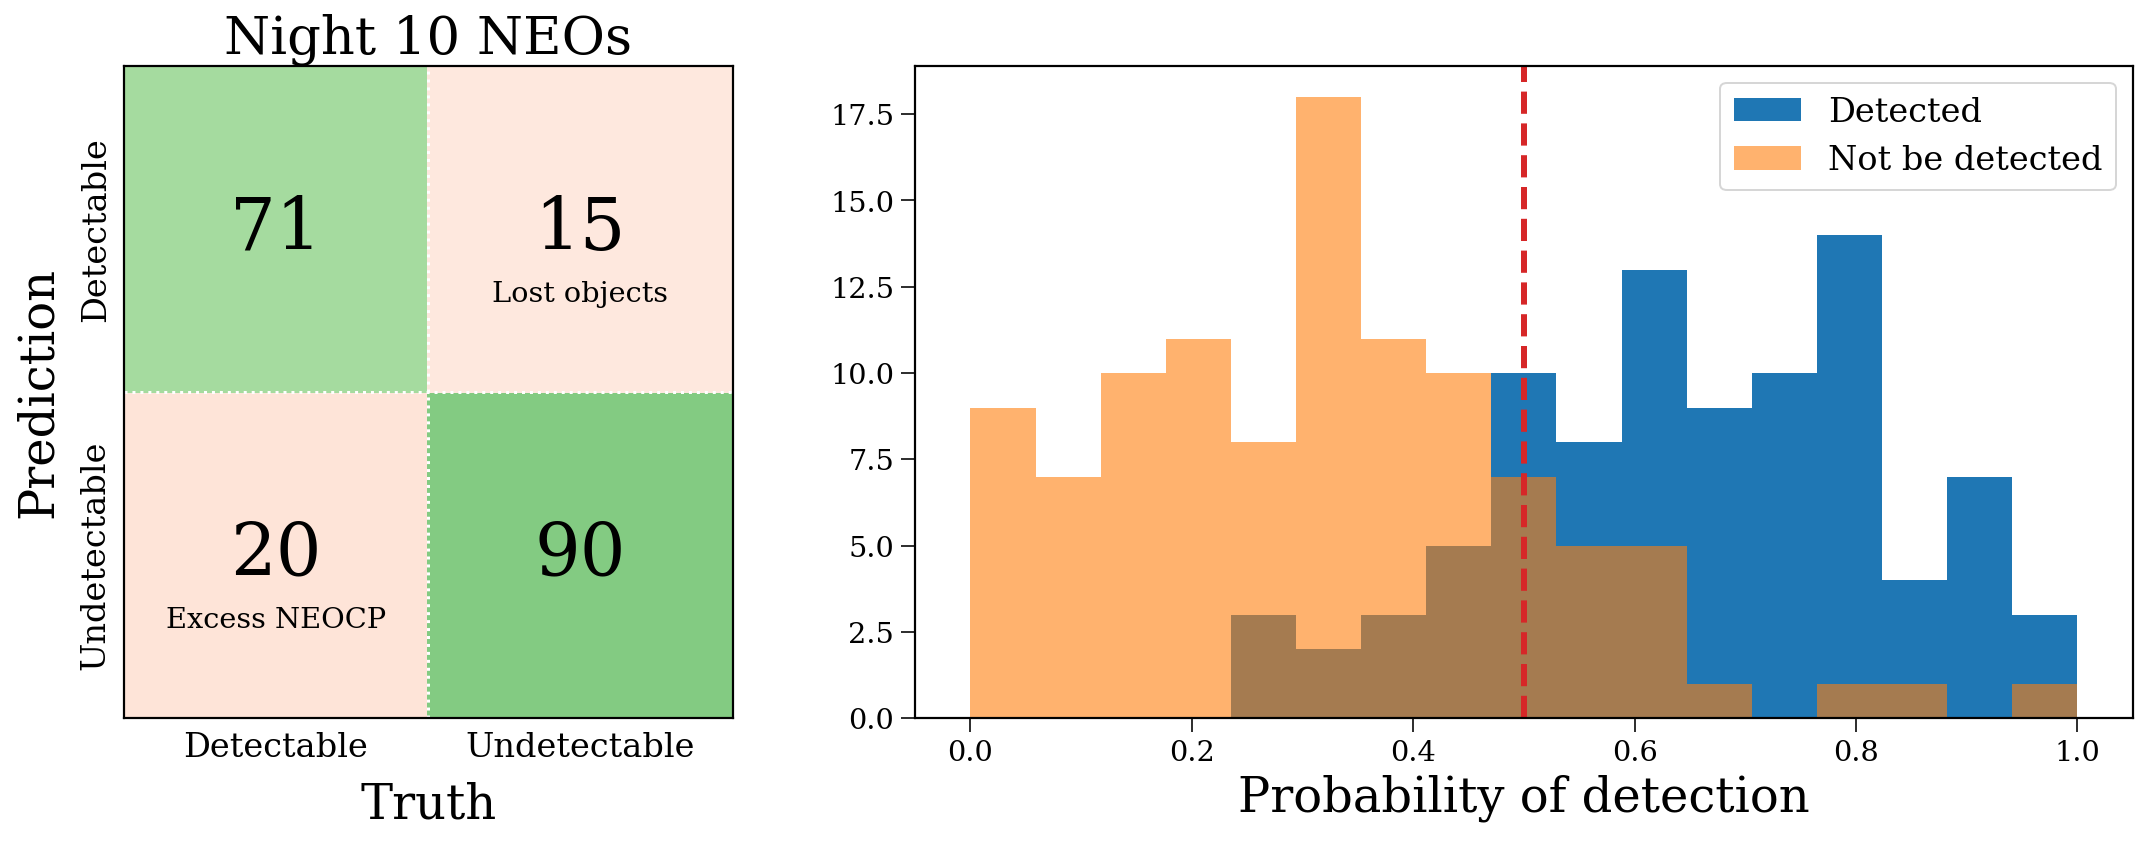

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 2]})

axes[0].set_title(f"Night {night_start} NEOs", fontsize=1.1*fs)

axes[0].axvline(0.5, color="white", linestyle="dotted")
axes[0].axhline(0.5, color="white", linestyle="dotted")

axes[0].annotate("Detectable", xy=(0.25, -0.02), xycoords="axes fraction", ha="center", va="top", fontsize=0.7*fs)
axes[0].annotate("Undetectable", xy=(0.75, -0.02), xycoords="axes fraction", ha="center", va="top", fontsize=0.7*fs)

axes[0].annotate("Undetectable", xy=(-0.02, 0.25), xycoords="axes fraction", ha="right", va="center", fontsize=0.7*fs, rotation=90)
axes[0].annotate("Detectable", xy=(-0.02, 0.75), xycoords="axes fraction", ha="right", va="center", fontsize=0.7*fs, rotation=90)

axes[0].annotate(incorrect_undetectable, xy=(0.25, 0.25), ha="center", va="center", fontsize=1.5*fs)
axes[0].annotate("Excess NEOCP", xy=(0.25, 0.15), ha="center", va="center", fontsize=0.6*fs)
axes[0].annotate(correct_undetectable, xy=(0.75, 0.25), ha="center", va="center", fontsize=1.5*fs)
axes[0].annotate(incorrect_detectable, xy=(0.75, 0.75), ha="center", va="center", fontsize=1.5*fs)
axes[0].annotate("Lost objects", xy=(0.75, 0.65), ha="center", va="center", fontsize=0.6*fs)
axes[0].annotate(correct_detectable, xy=(0.25, 0.75), ha="center", va="center", fontsize=1.5*fs)

axes[0].axvspan(0, 0.5, 0, 0.5, color=plt.cm.Reds(incorrect_undetectable / len(probs)))
axes[0].axvspan(0.5, 1, 0, 0.5, color=plt.cm.Greens(correct_undetectable / len(probs)))
axes[0].axvspan(0, 0.5, 0.5, 1, color=plt.cm.Greens(correct_detectable / len(probs)))
axes[0].axvspan(0.5, 1, 0.5, 1, color=plt.cm.Reds(incorrect_detectable / len(probs)))

axes[0].set_xlabel("\nTruth")
axes[0].set_ylabel("Prediction\n")

axes[0].set_xticks([])
axes[0].set_yticks([])

axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)

bins = np.linspace(0, 1, 18)
axes[1].hist(probs[will_be_detected], label="Detected", bins=bins)
axes[1].hist(probs[np.logical_not(will_be_detected)], alpha=0.6, label="Not be detected", bins=bins)
axes[1].axvline(threshold, color="tab:red", linestyle="--", lw=3)

axes[1].set_xlabel("Probability of detection")
axes[1].legend(fontsize=0.7*fs)

plt.show()

### okay let's investigate some wrong ones

In [13]:
unique_objs[np.logical_and(probs >= 0.85, np.logical_not(will_be_detected))]

Index(['000296A'], dtype='object', name='hex_id')

In [14]:
night_start = 10
path = "../neocp/neo/"
detection_window = 15
min_nights = 3

night_list = list(range(night_start, night_start + detection_window))
schedule = scheduling.get_LSST_schedule(night=(night_start, night_start + detection_window - 1))

# offset the schedule by one row and re-merge to get the previous night column
shifted = schedule.shift()
shifted = shifted.drop("observationStartMJD", axis=1)
shifted = shifted.rename(columns={"night": "previousNight"})
full_schedule = pd.merge(schedule, shifted["previousNight"], left_index=True, right_index=True)

# calculate the length of each night in days
night_lengths = np.zeros(detection_window)
for i, night in enumerate(night_list):
    mask = full_schedule["night"] == night

    # ignore nights that have no observations (bad weather/downtime)
    if not full_schedule[mask].empty:
        night_lengths[i] = full_schedule[mask].iloc[-1]["observationStartMJD"]\
            - full_schedule[mask].iloc[0]["observationStartMJD"]

# get the first/last visit from each night
night_transition = full_schedule["night"] != full_schedule["previousNight"]
first_visit_times = full_schedule[night_transition]["observationStartMJD"].values

last_times_ind = np.array(list(full_schedule[night_transition].index[1:]) + [len(full_schedule)]) - 1
last_visit_times = full_schedule.loc[last_times_ind]["observationStartMJD"].values

file = 0
visit_file = pd.read_hdf(path + f"filtered_visit_scores_{file:03d}.h5")

# get the objects from the night
obs_mask = np.logical_and(visit_file["night"] == night_start, visit_file["scores"] >= 65)
sorted_obs = visit_file[obs_mask].sort_values(["ObjID", "FieldMJD"])
unique_objs = sorted_obs.index.unique()

In [26]:
import variant_orbits
import scheduling
import detection_probability
import magnitudes
from importlib import reload
reload(scheduling)
reload(variant_orbits)
reload(detection_probability)
reload(magnitudes)

<module 'magnitudes' from '/data/epyc/projects/hybrid-sso-catalogs/lsst_detection_probability/magnitudes.py'>

In [15]:
s3m_cart = pd.read_hdf("../catalogues/s3m_cart.h5")
s3m_cart["hex_id"] = np.array(['{:07X}'.format(num) for num in np.arange(len(s3m_cart.index.values))])

In [16]:
hex_id = "000296A"

In [27]:
%%time
prob, joined_table = detection_probability.probability_from_id(hex_id, sorted_obs,
                                                 np.logspace(-1, 1, 50) * u.AU,
                                                 np.linspace(-100, 100, 20) * u.km / u.s,
                                                 first_visit_times, full_schedule,
                                                 night_lengths, night_list)

CPU times: user 13.5 s, sys: 18.5 s, total: 32 s
Wall time: 40.3 s


In [18]:
prob

0.9476661951909476

In [19]:
reachable_schedule = detection_probability.get_reachable_schedule(sorted_obs.loc[hex_id], first_visit_times,
                                                                  night_list, night_lengths, full_schedule)

In [20]:
%%time
orbits, truth = detection_probability.first_last_pos_from_id(hex_id, sorted_obs, s3m_cart,
                                                             np.logspace(-1, 1, 5) * u.AU,
                                                             np.linspace(-100, 100, 3) * u.km / u.s,
                                                             first_visit_times, last_visit_times)

CPU times: user 1.03 s, sys: 15.6 s, total: 16.6 s
Wall time: 18 s


In [21]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

In [39]:
reachable_schedule

fieldRA   fieldDec  observationStartMJD filter  fiveSigmaDepth  \
0      162.934300 -19.104468         59649.207792      i       23.927847   
1      158.037546 -22.339480         59649.208350      i       23.928427   
35     157.939479 -17.408535         59649.224041      i       24.178504   
45     159.654612 -19.653242         59649.228710      i       24.122166   
50     162.934300 -19.104468         59649.232492      r       24.565086   
...           ...        ...                  ...    ...             ...   
11669  170.104224 -16.328139         59662.267018      i       23.361337   
11670  167.192996 -16.123545         59662.267466      i       23.322588   
11672  168.943774 -13.448702         59662.268374      i       23.519298   
11673  166.091767 -13.232186         59662.268821      i       23.434358   
11677  160.436977 -12.725931         59662.270623      i       23.362336   

       night  previousNight  
0         10            NaN  
1         10           10.0  
35        10           10.0  
45        10           10.0  
50        10           10.0  
...      ...            ...  
11669     23           23.0  
11670     23           23.0  
11672     23           23.0  
11673     23           23.0  
11677     23           23.0  

[685 rows x 7 columns]

In [37]:
joined_table["night"].unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [45]:
joined_table.groupby("night").count()["orbit_id"].values

array([40299, 45955, 31108, 35350, 40299, 46662, 31108, 45955, 16261,
       31108, 10605, 82719,  7070, 19796])

In [47]:
joined_table.groupby("night").sum()["observed"] / joined_table.groupby("night").count()["orbit_id"].values

night
10    0.035088
11    0.037580
12    0.043301
13    0.000820
14    0.014690
15    0.011744
16    0.000868
17    0.005767
18    0.008302
19    0.000000
20    0.002735
21    0.012428
22    0.000000
23    0.000000
Name: observed, dtype: float64

In [28]:
reload(detection_probability)
interact(detection_probability.plot_LSST_schedule_with_orbits,
         schedule=fixed(schedule), reachable_schedule=fixed(joined_table),
         orbits=fixed(orbits), truth=fixed(truth),
         night=widgets.IntSlider(min=10, max=24, step=1, value=10, continuous_update=False),
         hex_id=fixed(hex_id),
         colour_by=widgets.Dropdown(
            value='distance',
            options=['distance', 'orbit'],
            description='Colour by:',
            ensure_option=True,
            disabled=False),
         lims=widgets.Dropdown(
            value='full_schedule',
            options=['orbits', 'full_schedule', 'schedule', 'reachable'],
            description='Axes limits:',
            ensure_option=True,
            disabled=False),
         filter_mask=widgets.Dropdown(
            value='all',
            options=['all', 'u', 'g', 'r', 'i', 'z', 'y'],
            description='Filter:',
            ensure_option=True,
            disabled=False),
         field_radius=fixed(2.1),
         s=widgets.IntSlider(min=1, max=25, step=1, value=15, continuous_update=False),
         show_mag_labels=widgets.ToggleButton(
            value=False,
            description='Show mag lims',
            disabled=False,
            button_style='success', # 'success', 'info', 'warning', 'danger' or ''
            tooltip='Whether to show limiting magnitudes for each field',
            icon='check'),
         fig=fixed(None), ax=fixed(None),show=fixed(True), cbar=fixed(True), ax_labels=fixed(True)
        )

interactive(children=(IntSlider(value=10, continuous_update=False, description='night', max=24, min=10), Dropd…

<function detection_probability.plot_LSST_schedule_with_orbits(schedule, reachable_schedule, orbits, truth, night, hex_id, colour_by='distance', lims='full_schedule', field_radius=2.1, s=10, filter_mask='all', show_mag_labels=False, fig=None, ax=None, show=True, ax_labels=True, cbar=True)>

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


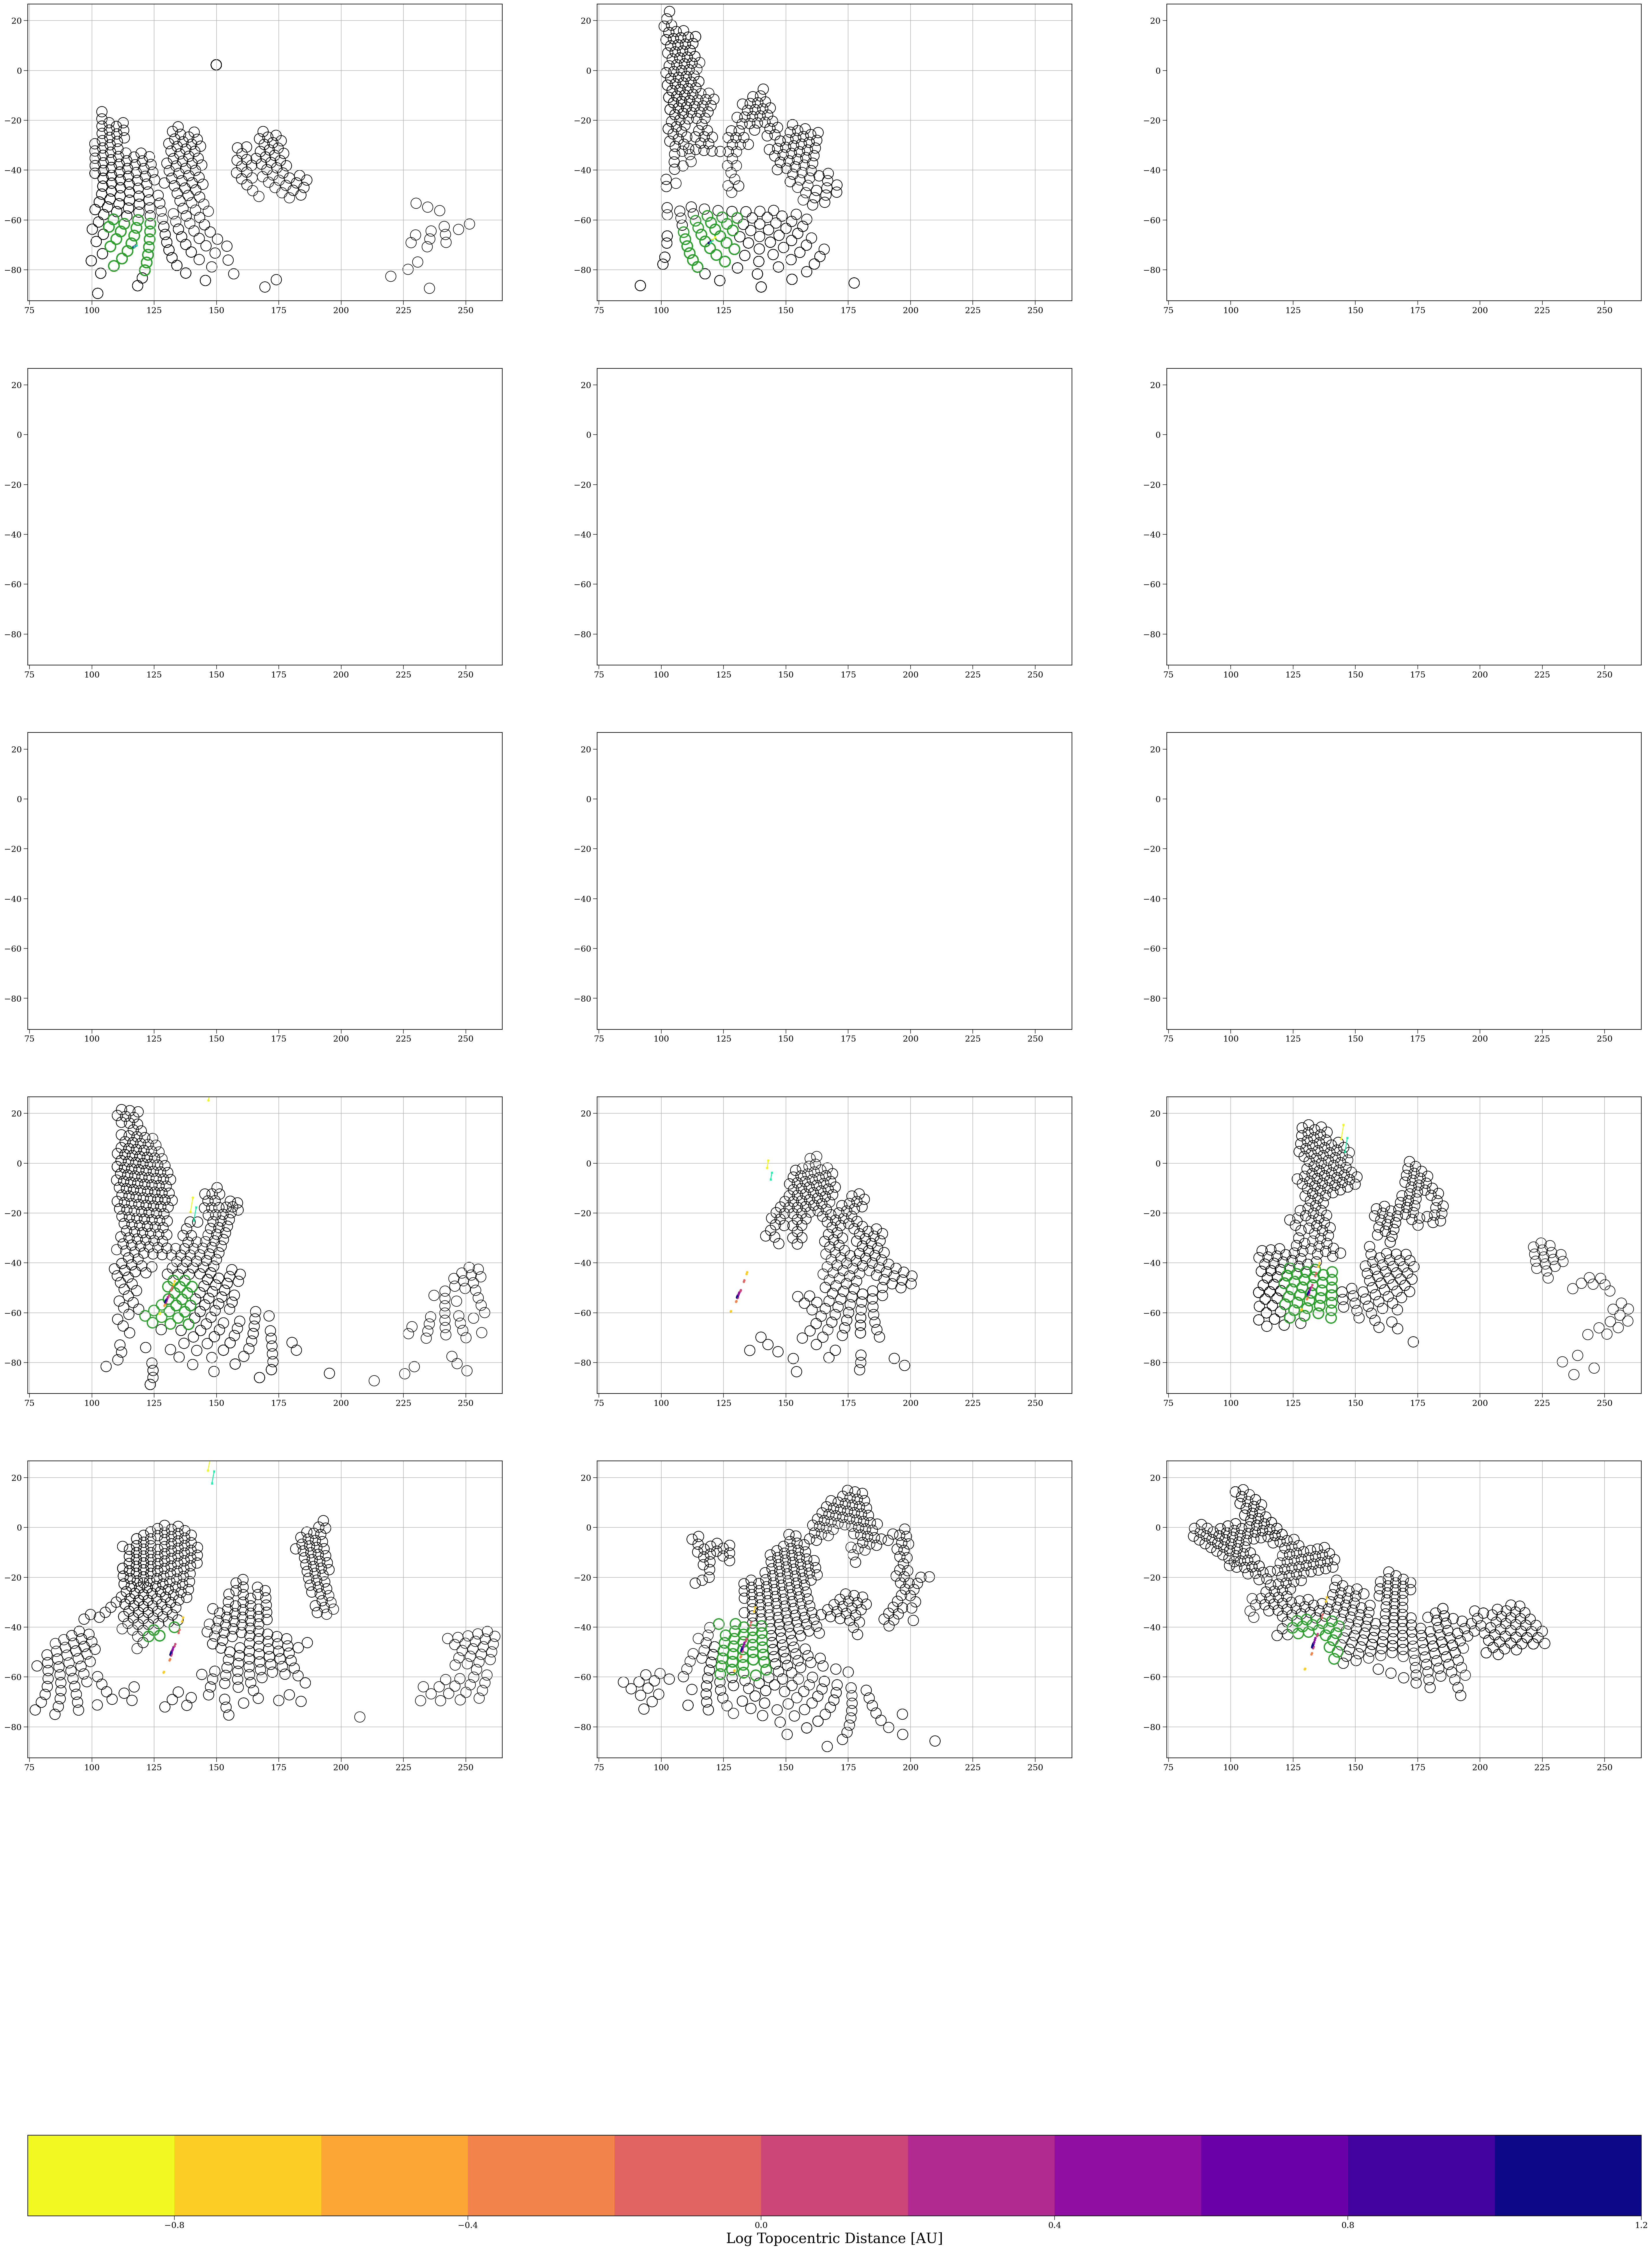

In [254]:
fig, axes = plt.subplots(5, 3, figsize=(50, 80))

for ax, night in zip(axes.ravel(), night_list):
    print(night)
    detection_probability.plot_LSST_schedule_with_orbits(schedule, reachable_schedule,
                                                         orbits, truth, night=night,
                                                         colour_by='distance', lims='full_schedule',
                                                         fig=fig, ax=ax, show=False, ax_labels=False, cbar=False)
    
    
    if ax == axes[0, 0]:
        fig.colorbar(ax.collections[2], ax=axes, orientation="horizontal",
                     label="Log Topocentric Distance [AU]")
    
plt.savefig("test.pdf", dpi=1000, format="pdf", bbox_inches="tight")
    
plt.show()

# Visualisation

## Mollweide Version

-3.1371407066833936 -0.7513176831839617


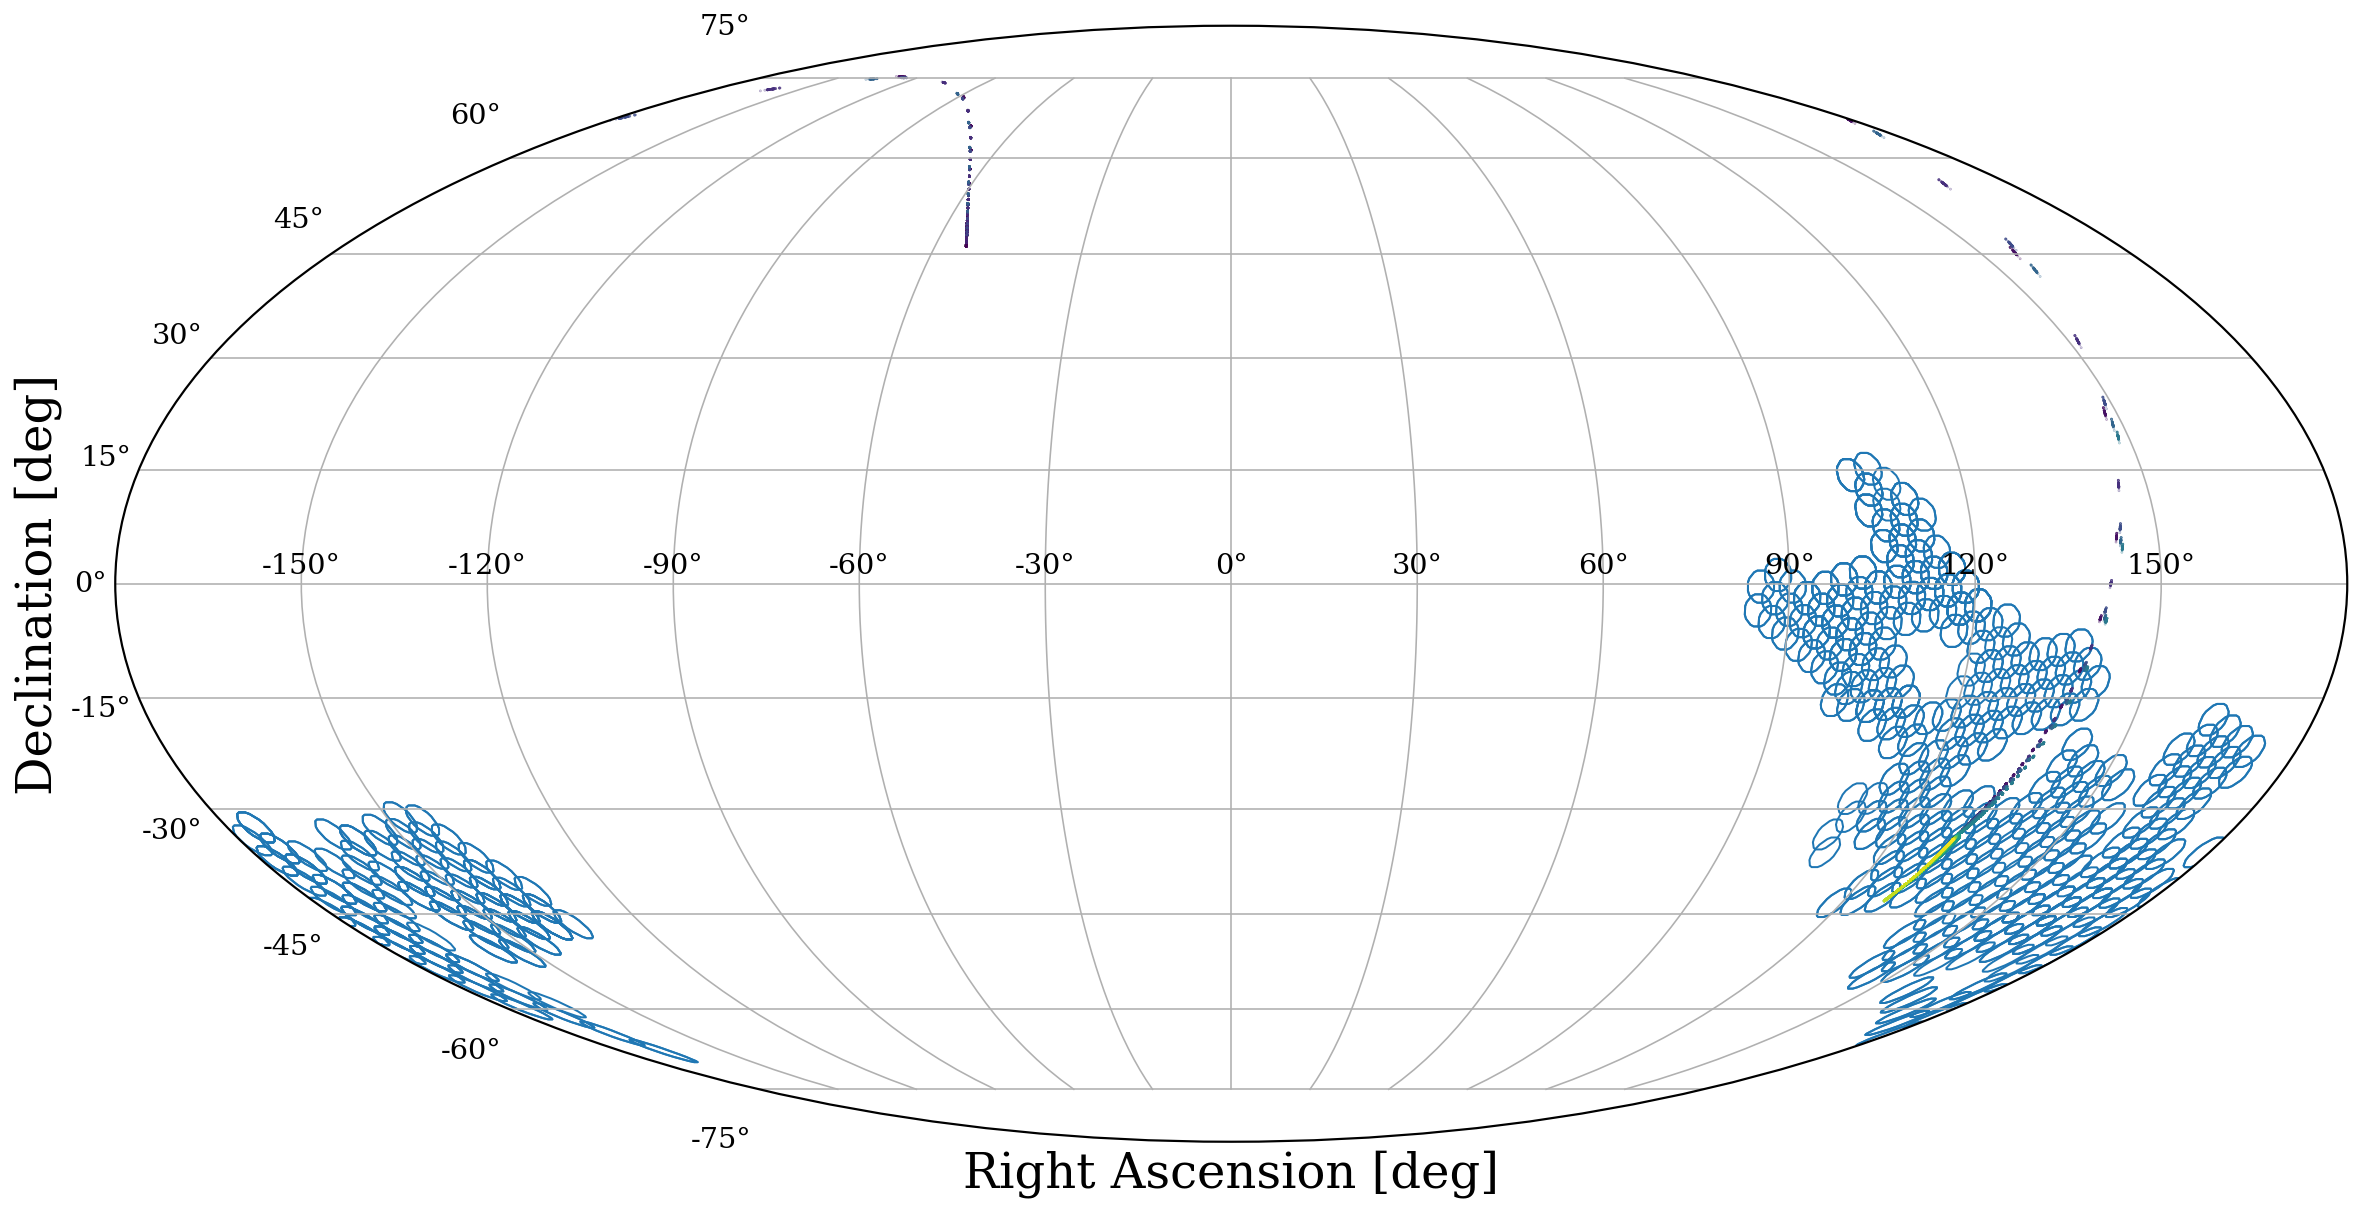

In [270]:
def mollweide_ra_dec(ra, dec):
    deg_to_ra = np.pi / 180
    
    converted_ra = ra * deg_to_ra
    converted_dec = dec * deg_to_ra
    
    converted_ra[converted_ra > np.pi] = converted_ra[converted_ra > np.pi] - 2 * np.pi
    return converted_ra, converted_dec
    

def plot_LSST_schedule_with_orbits_mollweide(df, orbits):
    """Plot LSST schedule up using the dataframe containing fields. Each is assumed to be a circle of radius
    2.1 degrees for simplicity.

    Parameters
    ----------
    df : `pandas DataFrame`
        DataFrame of fields (see `get_LSST_schedule`)
    """
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection="mollweide")

    ra_field, dec_field = mollweide_ra_dec(df["fieldRA"].values, df["fieldDec"].values)
    
    patches = [plt.Circle(center, 2.1 / 180 * np.pi) for center in np.transpose([ra_field, dec_field])]
    coll = PatchCollection(patches, edgecolors='tab:blue', facecolors="none")
    ax.add_collection(coll)
    
    orbit_ra, orbit_dec = mollweide_ra_dec(orbits["RA_deg"].values, orbits["Dec_deg"].values)
    ax.scatter(orbit_ra, orbit_dec, s=0.1, alpha=0.5, c=orbits["orbit_id"])
    
    print(orbit_ra.min(), orbit_dec.min())
    
#     ax.set_aspect("equal")

#     ax.set_xlim(df["fieldRA"].values.min() - 3, df["fieldRA"].values.max() + 3)
#     ax.set_ylim(df["fieldDec"].values.min() - 3, df["fieldDec"].values.max() + 3)

    ax.set_xlabel("Right Ascension [deg]")
    ax.set_ylabel("Declination [deg]")
    
    ax.grid()

    plt.show()

plot_LSST_schedule_with_orbits_mollweide(schedule[schedule["night"] == 14], orbits[orbits["night"] == 14])

## Regular Version

In [313]:
from matplotlib.colors import LogNorm

In [358]:
def plot_LSST_schedule_with_orbits(schedule, reachable_schedule, orbits, night, colour_by="distance", lims="schedule"):
    """Plot LSST schedule up using the dataframe containing fields. Each is assumed to be a circle of radius
    2.1 degrees for simplicity.

    Parameters
    ----------
    df : `pandas DataFrame`
        DataFrame of fields (see `get_LSST_schedule`)
    """
    mask = orbits["night"] == night    
    if len(mask[mask]) == 0:
        print("Warning: No observations in this night")
        return

    fig, ax = plt.subplots(figsize=(20, 10))
    
    for table, colour, lw in zip([schedule, reachable_schedule], ["black", "tab:green"], [1, 2]):
        ra_field, dec_field = table["fieldRA"][table["night"] == night], table["fieldDec"][table["night"] == night]
        patches = [plt.Circle(center, 2.1) for center in np.transpose([ra_field, dec_field])]
        coll = PatchCollection(patches, edgecolors=colour, facecolors="none", linewidths=lw)
        ax.add_collection(coll)
    
    if colour_by == "orbit":
        ax.scatter(orbits["RA_deg"][mask], orbits["Dec_deg"][mask], s=0.5, alpha=1, c=orbits["orbit_id"][mask])
    elif colour_by == "distance":
        scatter = ax.scatter(orbits["RA_deg"][mask], orbits["Dec_deg"][mask], s=0.5, alpha=1, c=orbits["r_au"][mask],
                             norm=LogNorm(vmin=1e-1, vmax=2e1), cmap="magma")
        fig.colorbar(scatter, label="Distance [AU]")
    else:
        raise ValueError("Invalid value for colour_by")
    
    ax.set_aspect("equal")

    if lims in ["schedule", "reachable"]:
        table = schedule if lims == "schedule" else reachable_schedule
        ax.set_xlim(table[table["night"] == night]["fieldRA"].min() - 3, table[table["night"] == night]["fieldRA"].max() + 3)
        ax.set_ylim(table[table["night"] == night]["fieldDec"].min() - 3, table[table["night"] == night]["fieldDec"].max() + 3)

    ax.set_xlabel("Right Ascension [deg]")
    ax.set_ylabel("Declination [deg]")
    
    ax.grid()

    plt.show()

In [72]:
interact(plot_LSST_schedule_with_orbits, schedule=fixed(schedule), reachable_schedule=fixed(reachable_schedule), orbits=fixed(joined_table),
         night=widgets.IntSlider(min=0, max=14, step=1, value=0, continuous_update=False),
         colour_by=widgets.Combobox(
            value='distance',
            options=['distance', 'orbit'],
            description='Colour by:',
            ensure_option=True,
            disabled=False),
         lims=widgets.Combobox(
            value='orbits',
            options=['orbits', 'schedule', 'reachable'],
            description='Axes limits:',
            ensure_option=True,
            disabled=False)
        )

NameError: name 'plot_LSST_schedule_with_orbits' is not defined

# Weights from Hybrid (TODO)

In [159]:
hybrid = pd.read_hdf("../catalogues/hybrid_cart.h5")

In [163]:
from astropy.coordinates import SkyCoord, get_body

In [217]:
first = 100000

In [269]:
earth = SkyCoord(x=0 * u.AU, y=0 * u.AU, z=0 * u.AU,
         v_x=0 * u.AU / u.s, v_y=0 * u.AU / u.s, v_z=0 * u.AU / u.s,
         frame="gcrs", representation_type="cartesian",
         obstime=Time(59639.0, format="mjd")).transform_to("heliocentriceclipticiau76").represent_as("cartesian")

In [399]:
test = SkyCoord(x=hybrid["x"][:first] * u.AU, y=hybrid["y"][:first] * u.AU,
         z=hybrid["z"][:first] * u.AU,
         v_x=hybrid["vx"][:first] * u.km / u.s, v_y=hybrid["vy"][:first] * u.km / u.s,
         v_z=hybrid["vz"][:first] * u.km / u.s,
         representation_type="cartesian",
         frame="heliocentriceclipticiau76",
         obstime=Time(59639.0, format="mjd")).represent_as("cartesian")

In [191]:
import matplotlib.pyplot as plt

In [400]:
distance = np.sqrt((test.x - earth.x)**2 + (test.y - earth.y)**2 + (test.z - earth.z)**2)

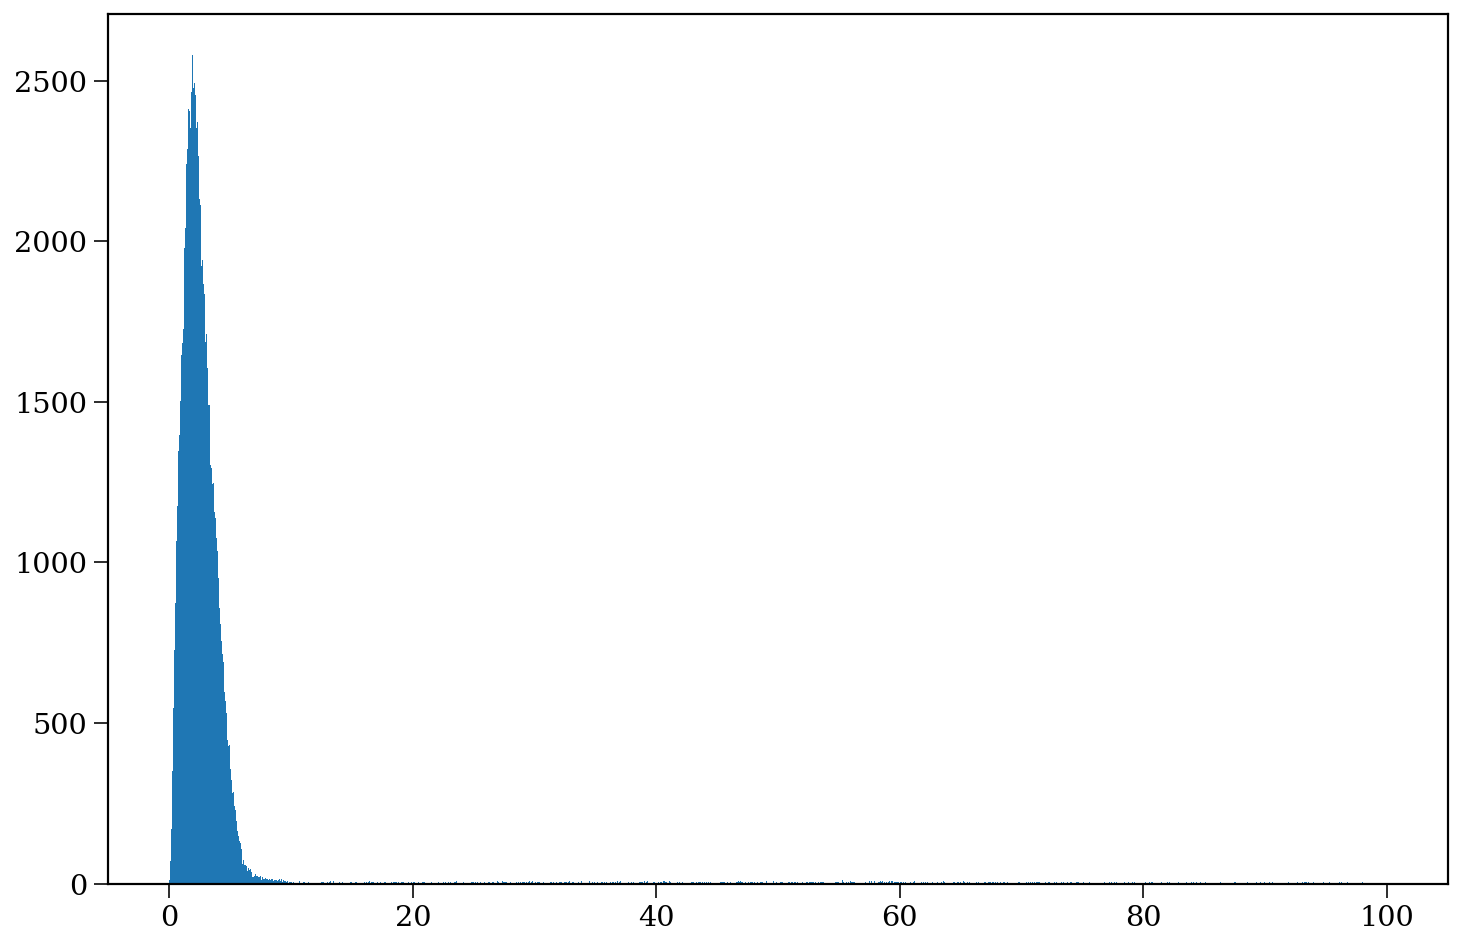

In [401]:
plt.hist(distance.value, range=(0, 100), bins="fd")
plt.show()

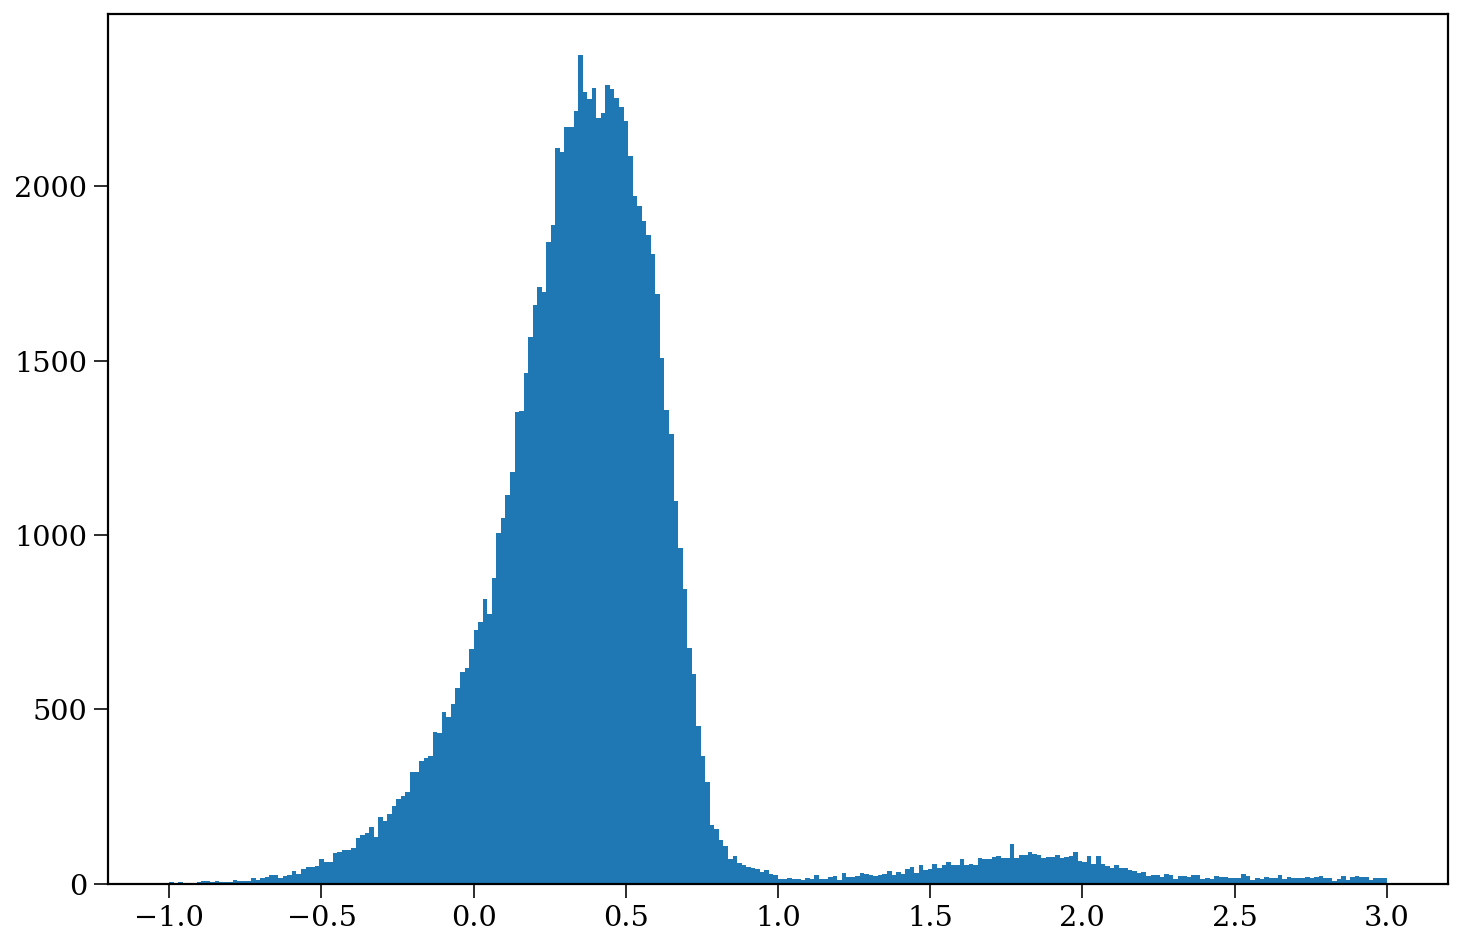

In [402]:
plt.hist(np.log10(distance.value), range=(-1, 3), bins="fd")
plt.show()

In [275]:
rv = (np.sum((test.differentials['s'].d_xyz - earth.differentials["s"].d_xyz[:, None])**2, axis=0)**(0.5)).to(u.km / u.s)

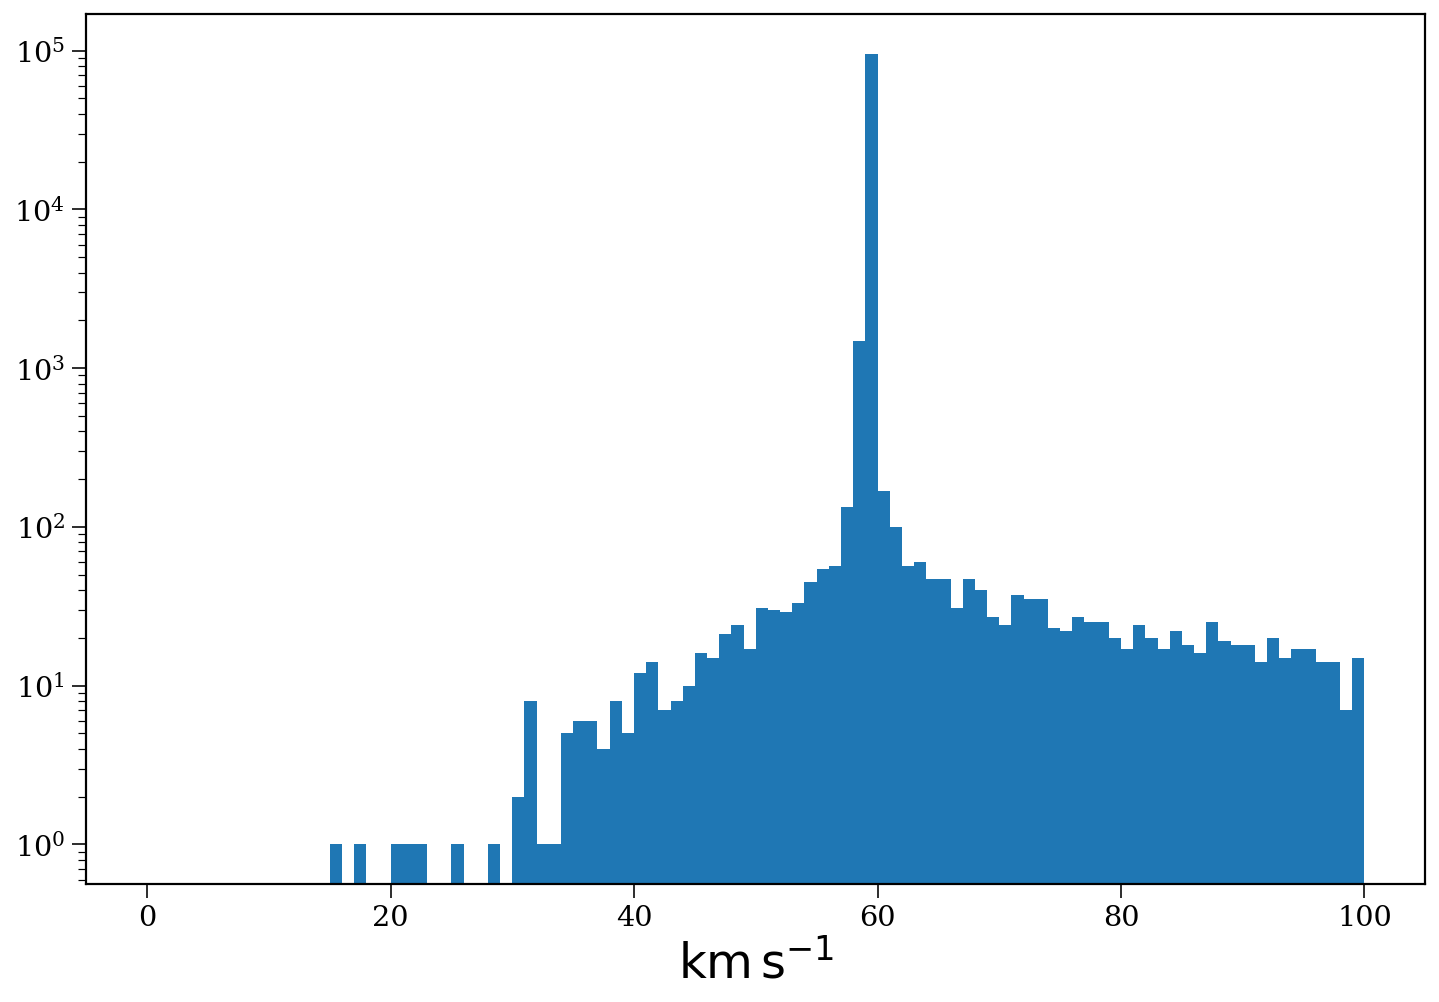

In [277]:
plt.hist(rv, bins=100, range=(0, 100), log=True)
plt.show()